## #08 -pandas 시각화

### pandas와 pyplot의 연계
- pandas의 시리즈나 ㅔㄷ이터 프레임은 plot이라는 시각화 함수를 내장하고 있다.
- plotdms matplotlib를 내부적으로 임포트 하고 사용한다.

## #01. 필요한 패키지 및 샘플 데이터 준비

### 1) 패키지 참조

In [1]:
import numpy
from pandas import DataFrame
from pandas import read_csv
from matplotlib import pyplot

### 2) 데이터 가져오기
> 데이터 출처 : [Kosis 국가 통계 포털]

In [28]:
교통사고csv = read_csv("http://itpaper.co.kr/demo/py/traffic.csv", encoding="euc-kr")
교통사고csv

,년도,월,발생건수,사망자수,부상자수
0,2005,1,15494,504,25413
1,2005,2,13244,431,21635
2,2005,3,16580,477,25550
3,2005,4,17817,507,28131
4,2005,5,19085,571,29808
...,...,...,...,...,...
163,2018,8,18335,357,27749
164,2018,9,18371,348,27751
165,2018,10,19738,373,28836
166,2018,11,19029,298,28000


### 3)데이터 전처리(년도별 합계 구하기)

In [29]:
교통사고tmp = 교통사고csv.filter(['년도','발생건수','사망자수','부상자수'])
교통사고df = 교통사고tmp.groupby(['년도']).sum()
교통사고df

,발생건수,사망자수,부상자수
년도,,,
2005,214171,6376,342233
2006,213745,6327,340229
2007,211662,6166,335906
2008,215822,5870,338962
2009,231990,5838,361875
2010,226878,5505,352458
2011,221711,5229,341391
2012,223656,5392,344565
2013,215354,5092,328711


## #02. 그래프에 대한 전역 환경 설정
이 코드가 다시 실행되기 전까지 모든 그래프 출력에 대해 적용된다.

In [30]:
#한글폰트, 그래픽 크기 설정
pyplot.rcParams["font.family"] = 'AppleGothic'
pyplot.rcParams["font.size"] = 16
pyplot.rcParams["figure.figsize"] = (20,10)

## #03. 선 그래프
### 1) 특정 컬럼에 대한 선 그래프

DataFrame객체의 plot()함수를 사용한다.

#### 기본 옵션만 사용하기
** 그래프 생성시 주의사항** : 모든 코드가 하나의 블록안에서 구현되어야 한다.

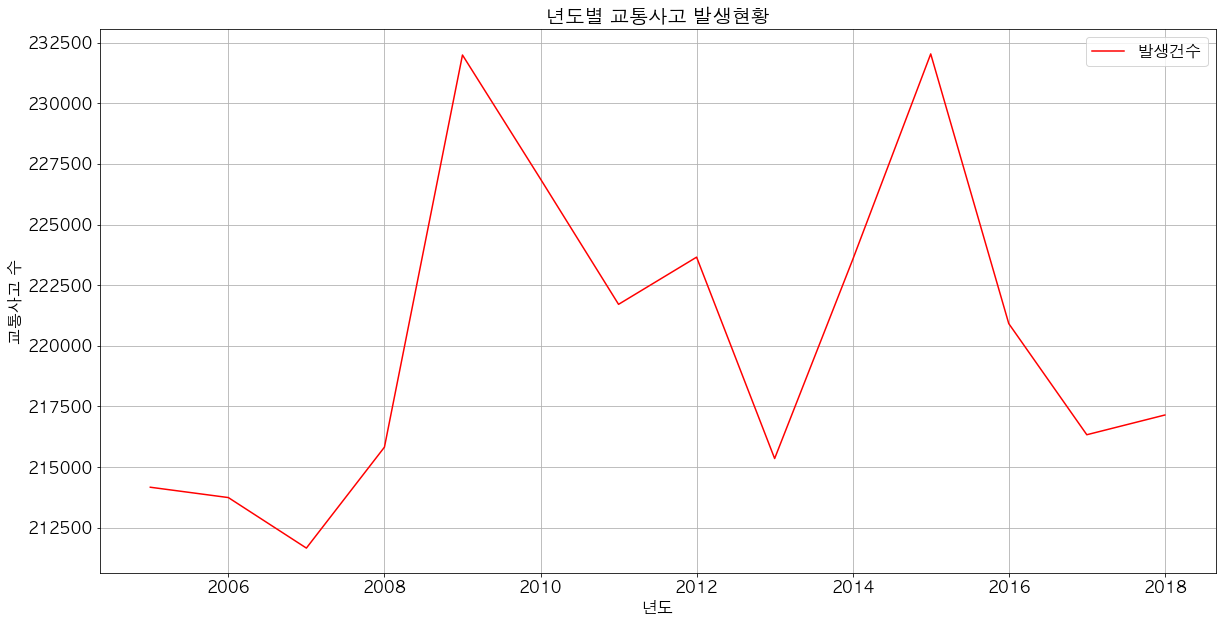

In [31]:
교통사고df['발생건수'].plot(color = '#ff0000')
pyplot.grid()
pyplot.legend()
pyplot.title("년도별 교통사고 발생현황")
pyplot.xlabel("년도")
pyplot.ylabel("교통사고 수")
pyplot.show()

#### x 축에 대한 텍스트 재지정
##### x 좌표를 의미할 리스트나 배열 생성

In [32]:
xpos = numpy.arange(len(교통사고df['발생건수']))
xpos

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13])

In [33]:
xtext = list(교통사고df.index)

for i, v in enumerate(xtext):
    xtext[i] = "%d년" %v
    
xtext

['2005년',
 '2006년',
 '2007년',
 '2008년',
 '2009년',
 '2010년',
 '2011년',
 '2012년',
 '2013년',
 '2014년',
 '2015년',
 '2016년',
 '2017년',
 '2018년']

#### x 축을 지정하여 그래프 표현하기 (DataFrame의 index가 숫자로만 되어있는경우)

DataFrame의 index가 숫자 타입으로 구성되어 있는 경우는 index값 자체가 xcnrdml whkvyfmf dmlalgksek.

x축의 좌표 어디에 어떤 값을 출력해야 한다는 의미로 xticks()함수를적용.

>기존의 index와 이를 대체해서 출력할 리스트를 'xticks()'함수에 적용한다.

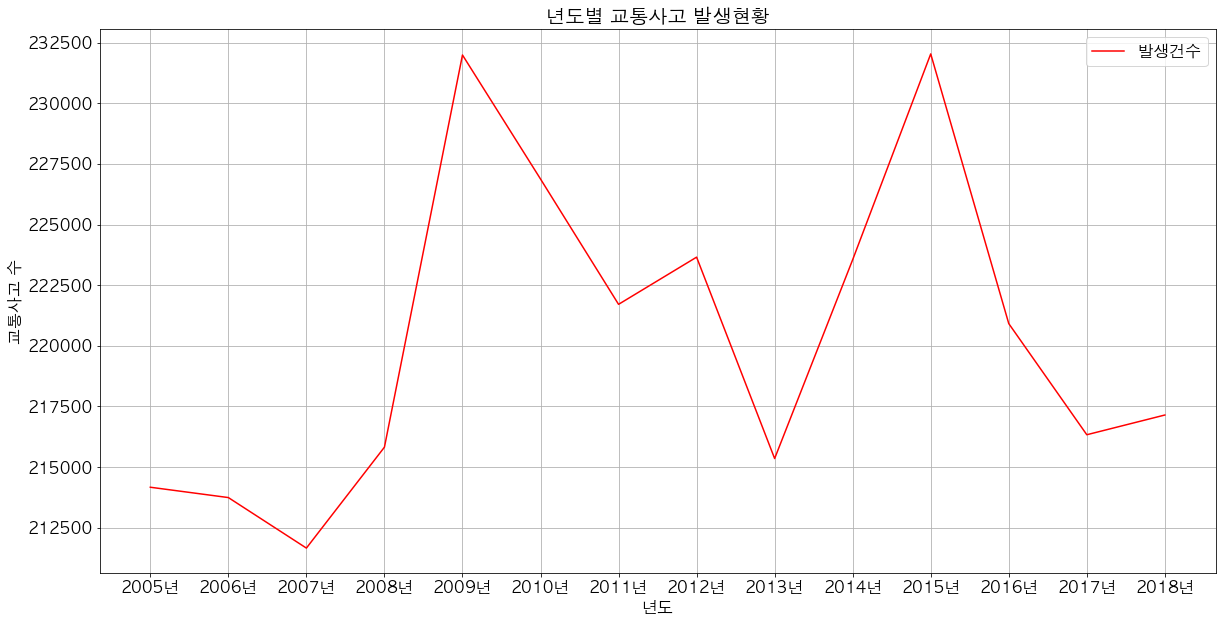

In [34]:
#특정 컬럼에 대해서만 시각화 하기
교통사고df['발생건수'].plot(color='#ff0000')
pyplot.grid()
pyplot.legend()
pyplot.title("년도별 교통사고 발생현황")
pyplot.xlabel("년도")
pyplot.ylabel("교통사고 수")
pyplot.xticks(교통사고df.index, xtext)
pyplot.show()

##### x축을 지정하여 그래프 표현하기( 데이타 프레임이 인덱스가 숫자가 아닌경우

##### 인덱스가 문자열로 사용되도록 전처리

>인덱스가 문자열로 구성된 경우를만들기 위해서 진행한 과정임

In [35]:
교통사고copy = 교통사고df.copy();

현재인덱스 = list(교통사고copy.index)

indexDict = {}

for i, v in enumerate(xtext):
    before = 현재인덱스[i];
    indexDict[before] = v
교통사고copy.rename(index=indexDict, inplace=True)
교통사고copy

,발생건수,사망자수,부상자수
년도,,,
2005년,214171,6376,342233
2006년,213745,6327,340229
2007년,211662,6166,335906
2008년,215822,5870,338962
2009년,231990,5838,361875
2010년,226878,5505,352458
2011년,221711,5229,341391
2012년,223656,5392,344565
2013년,215354,5092,328711


x축 좌표값으로 이루어진 배열(혹은 리스트)

In [36]:
xpos = numpy.arange(len(교통사고copy.index))
xpos

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13])

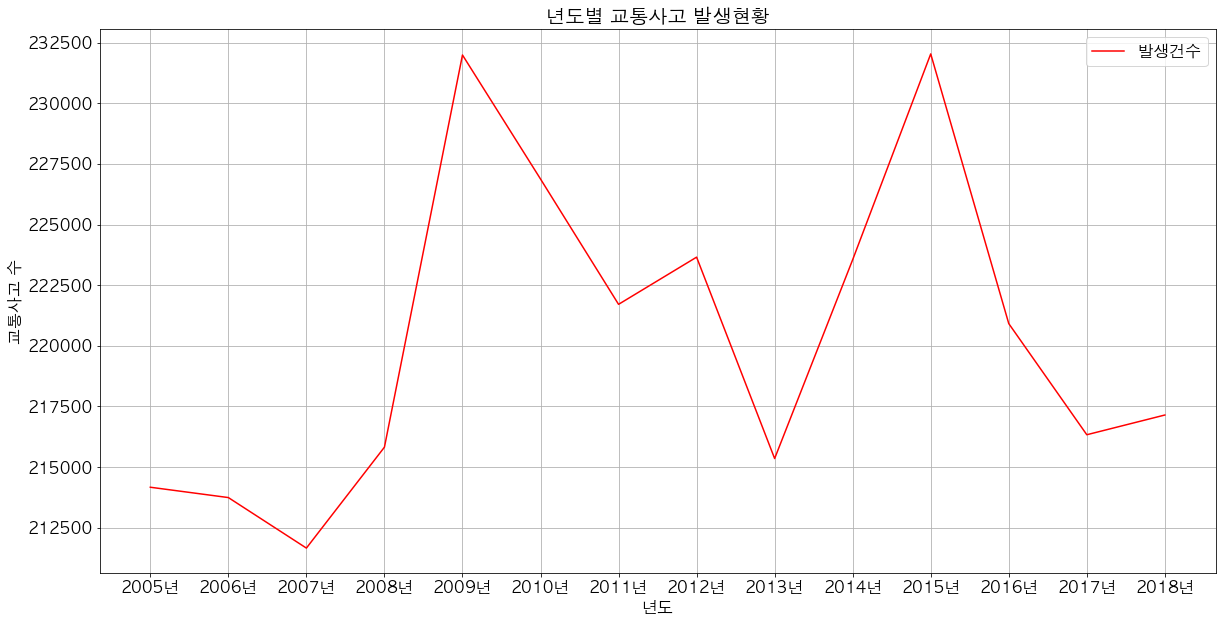

In [37]:
#특정 컬럼에 대해서만 시각화 하기
교통사고copy['발생건수'].plot(color='#ff0000')
pyplot.grid()
pyplot.legend()
pyplot.title("년도별 교통사고 발생현황")
pyplot.xlabel("년도")
pyplot.ylabel("교통사고 수")
pyplot.xticks(xpos, xtext)
pyplot.show()

### 2) 전체 컬럼에 대한 다중 선 그래프
### 'plot()' 함수의 color 파라미터를 사용하여 선 색상 지정하기
- 단일값을 적용한 경우 모든 선이 동일한 색상으로 표시됨
- 컬럼 수 만큼 색상값을 원소로 갖는 리스트를 적용한 경우 각 선의 색상을 지정할 수 있음

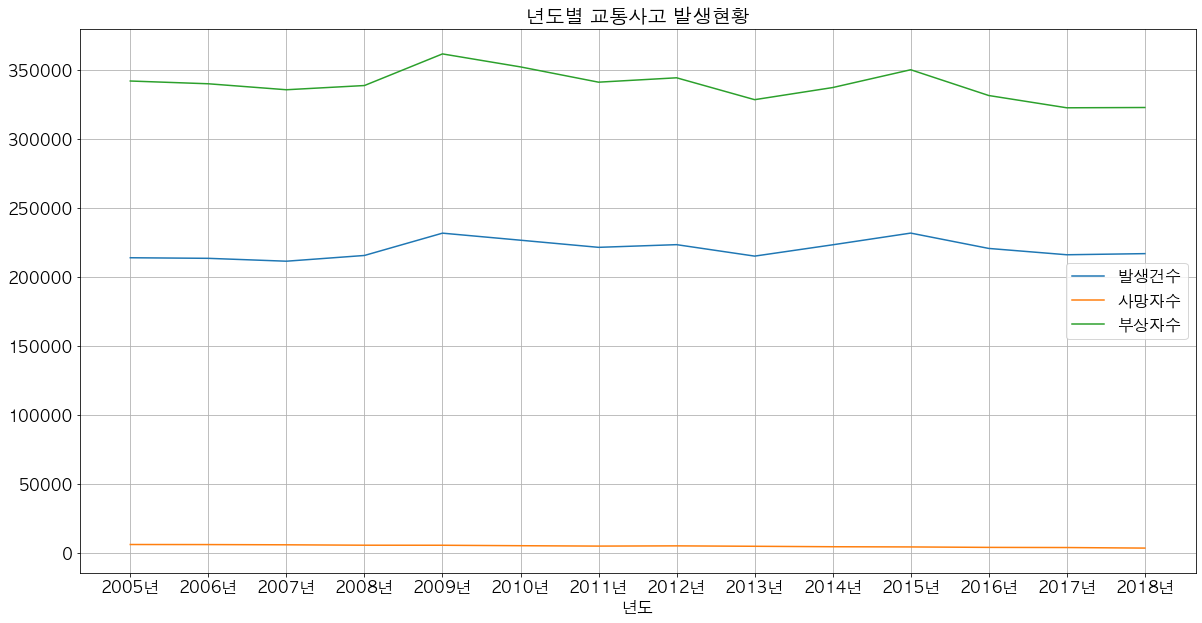

In [38]:
# 특정 컬럼에 대해서만 시각화 하기
# 월별 고통사고.plot(color ='#660000')
# 월별 고통사고.plot(color ='#660000','#660000','#660000')
교통사고df.plot()
pyplot.grid()
pyplot.legend()
pyplot.title("년도별 교통사고 발생현황")
pyplot.xlabel("년도")

pyplot.xticks(교통사고df.index, xtext)
pyplot.show()

## #04. 세로 막대 그래프
### 1) 특정 컬럼에 대한 시각화
#### 기본 옵션만 사용하기

'''
python
데이터 프레임객체 ['컬럼']. plot.bar()
'''

*rot 파라미터는 x축 텍스트의 각도. 기본값 90
*width 파라미터는 모든 막대가 공백없이 꽉 찬 상태를 1로 하여 비율적으로 지정. 기본값은 0.5

막대그래프는 index의 데이터 타입이 숫자, 문자열에 상관없이 x축이 0부터 시작되는 좌표계를 갖느다.

그러므로'xticks()' 함수를 사용할때 반드시 x축 좌표에 대한 지정이 이루어져야 한다.


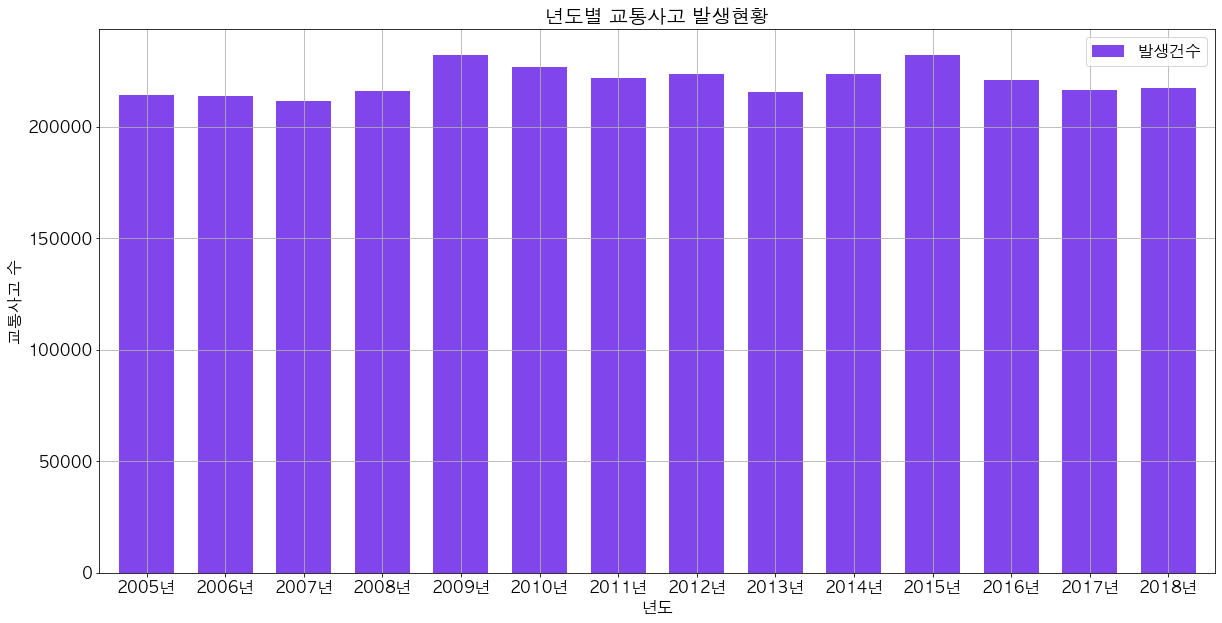

In [39]:
교통사고df['발생건수'].plot.bar(color='#8046eb', rot =0 , width=0.7)
pyplot.grid()
pyplot.legend()
pyplot.title("년도별 교통사고 발생현황")
pyplot.xlabel("년도")
pyplot.ylabel("교통사고 수")
pyplot.xticks(xpos, xtext)
pyplot.show()

In [40]:
#### 텍스트 출력 처리, y축 범위 조정

텍스트 출력은 그래프 상의 x,y좌표를 구해서 모든 문자열을 개별적으로 출력해야 한다. 이를 위해 반복문이 사용된다.

SyntaxError: invalid syntax (<ipython-input-40-ecd8b510f114>, line 3)

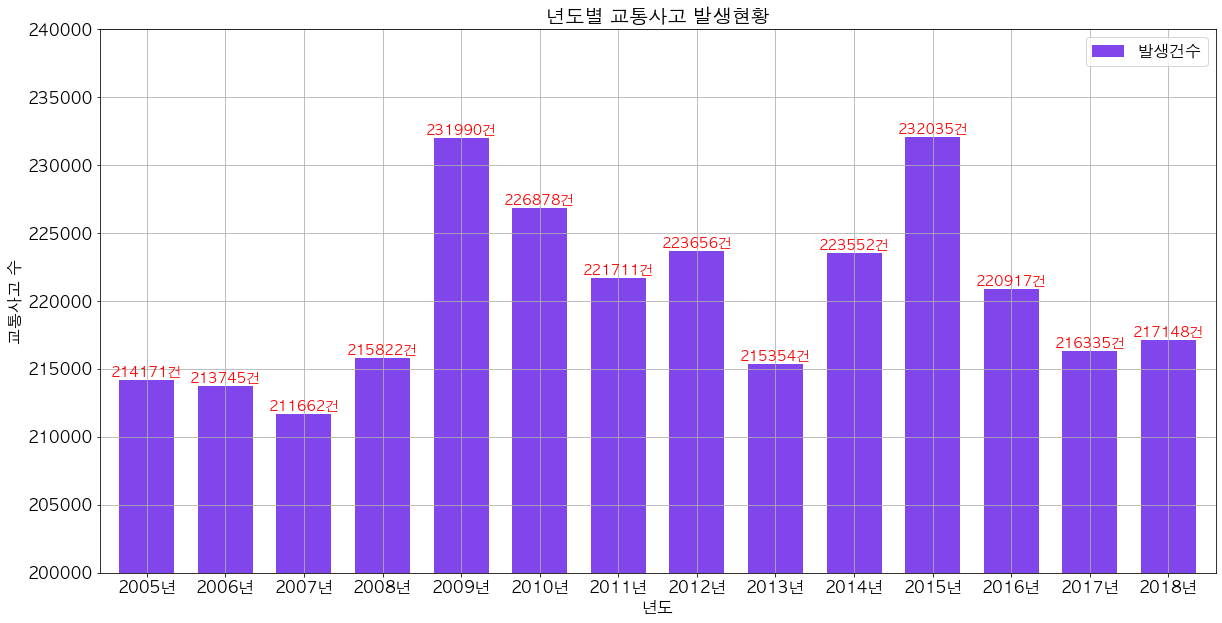

In [41]:
교통사고df['발생건수'].plot.bar(color='#8046eb', rot =0 , width=0.7)
pyplot.grid()
pyplot.legend()
pyplot.title("년도별 교통사고 발생현황")
pyplot.xlabel("년도")
pyplot.ylabel("교통사고 수")
pyplot.xticks(xpos, xtext)

#y축의 범위 설정 /x축의 범위를 설정할 경우 xlim(min,max)사용
pyplot.ylim(200000,240000)

#그래프에 텍스트 표시하기
#그래프에 표시되는 실 데이터는 y축좌표를 의미하고, x축은 0부터 시작하는 좌표값을 갖는다.
for i, v in enumerate(list(교통사고df['발생건수']) ):
    txt ="%d건" % v
    pyplot.text(i, v, txt, fontsize=14, color ='#ff0000',
               horizontalalignment='center', verticalalignment='bottom')
    




pyplot.show()

### 2)전체 컬럼에 대한 시각화

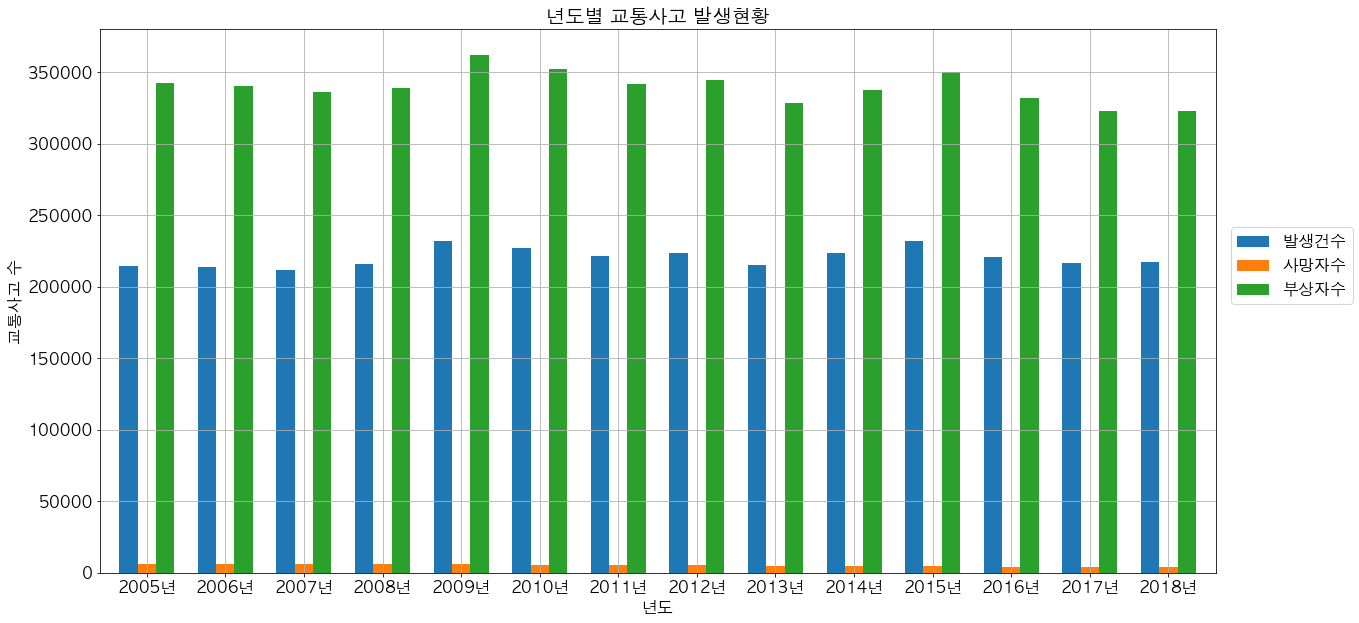

In [42]:
교통사고df.plot.bar(rot=0, width=0.7)
pyplot.grid()

# 혹은 범주의 위치를 변경할 수 있음
#pyplot.legend()
#그래프 밖 좌측 하단
#pyplot.legend(bbox_to_anchor=(0,0))
#그래프 밖 우측 상단
#pyplot.legend(bbox_to_anchor=(0,0))

pyplot.legend(bbox_to_anchor=(1.13,0.65))
pyplot.title("년도별 교통사고 발생현황")
pyplot.xlabel("년도")
pyplot.ylabel("교통사고 수")
pyplot.xticks(xpos, xtext)

pyplot.show()



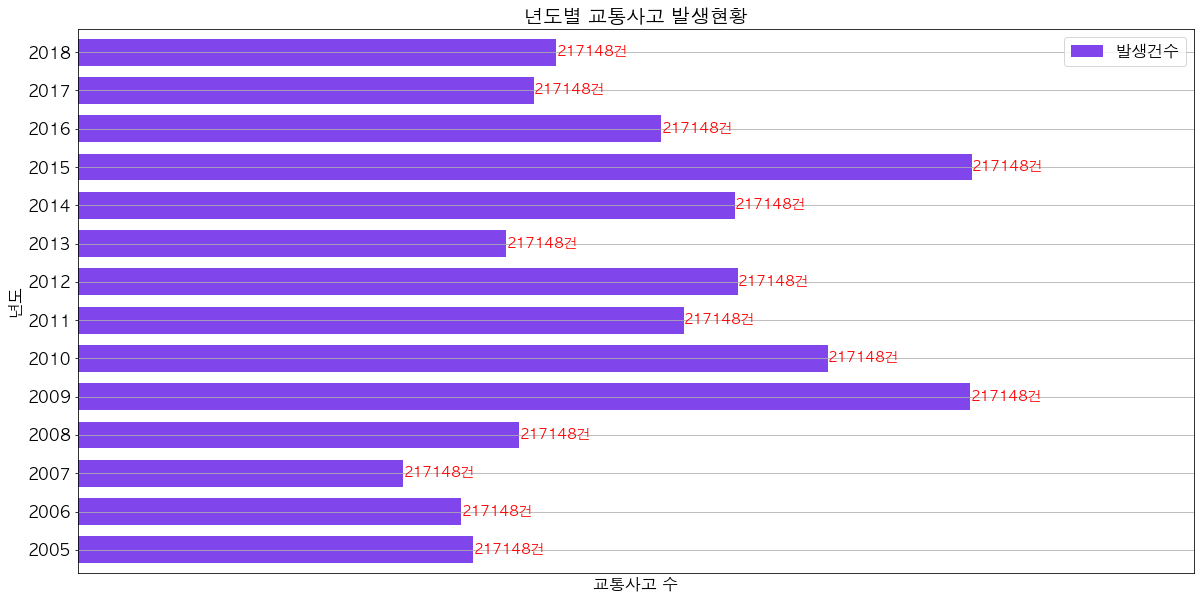

In [43]:
교통사고df['발생건수'].plot.barh(color='#8046eb', rot =0 , width=0.7)
pyplot.grid()
pyplot.legend()
pyplot.title("년도별 교통사고 발생현황")
pyplot.ylabel("년도")
pyplot.xlabel("교통사고 수")
pyplot.xticks(xpos, xtext)

#y축의 범위 설정 /x축의 범위를 설정할 경우 xlim(min,max)사용
pyplot.xlim(200000,240000)

#그래프에 텍스트 표시하기
#그래프에 표시되는 실 데이터는 y축좌표를 의미하고, x축은 0부터 시작하는 좌표값을 갖는다.
for x, y in enumerate(list(교통사고df['발생건수']) ):
    txt ="%d건" % v
    pyplot.text(y, x, txt, fontsize=14, color ='#ff0000',
               horizontalalignment='left', verticalalignment='center')
    




pyplot.show()

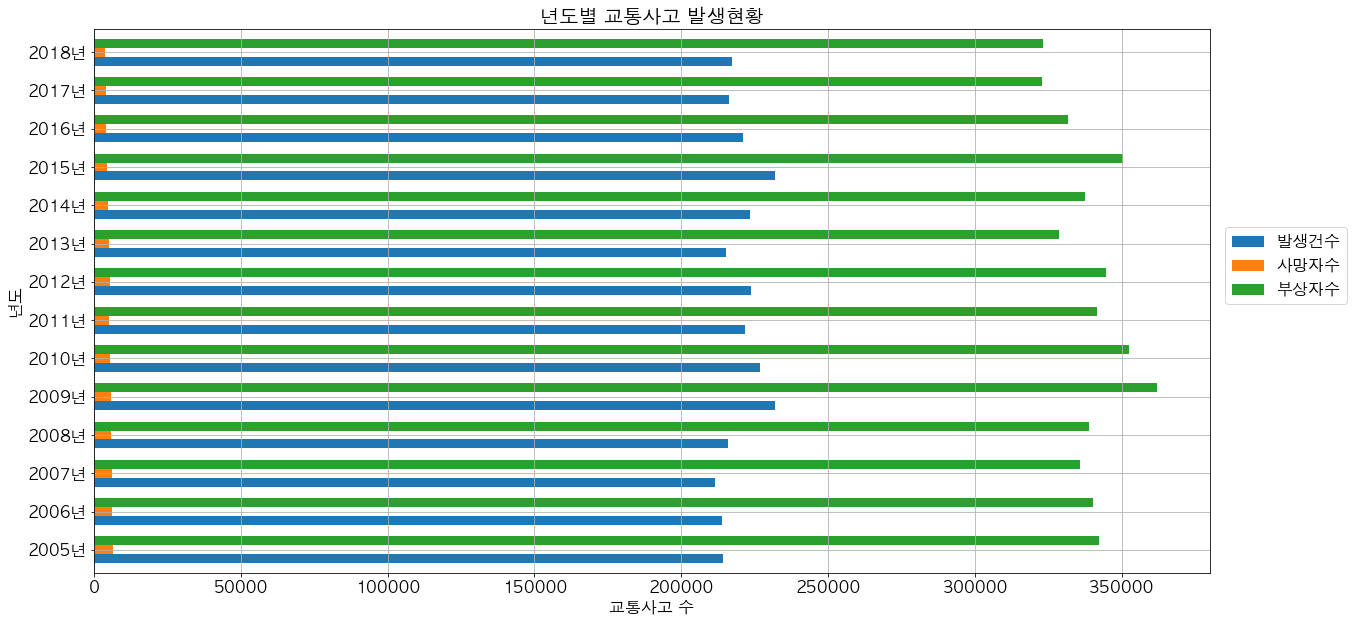

In [44]:
교통사고df.plot.barh(rot=0, width=0.7)
pyplot.grid()

# 혹은 범주의 위치를 변경할 수 있음
#pyplot.legend()
#그래프 밖 좌측 하단
#pyplot.legend(bbox_to_anchor=(0,0))
#그래프 밖 우측 상단
#pyplot.legend(bbox_to_anchor=(0,0))

pyplot.legend(bbox_to_anchor=(1.13,0.65))
pyplot.title("년도별 교통사고 발생현황")
pyplot.ylabel("년도")
pyplot.xlabel("교통사고 수")
pyplot.yticks(xpos, xtext)

pyplot.show()

## #06. 파이 그래프

데이터 프레임의 턱정 컬럼을 지정하여 전체를 기준으로 어느정도의 비유을 차지하는지 시각화 하는 그래프

### 1) 파이 그래프 기본형

In [45]:
# 각 컬럼별로 평균 구하기
교통사고평균 = 교통사고df.mean()
교통사고평균

발생건수    220355.428571
사망자수      5245.428571
부상자수    339415.214286
dtype: float64

In [46]:
#구해진 결과를 사요해서 데이터 프레임 생성
교통사고평균df = DataFrame(교통사고평균, columns = ['교통사고'])
교통사고평균df

,교통사고
발생건수,220355.428571
사망자수,5245.428571
부상자수,339415.214286


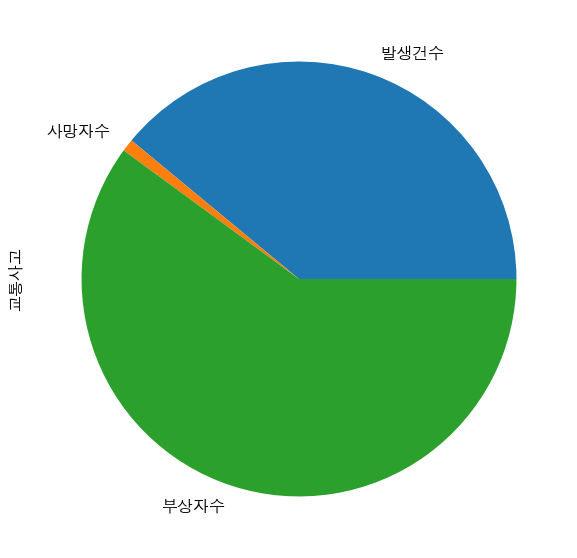

In [47]:
#데이터 프레임의 특정 컬럼에 대한 파이그래프 표시 -> 반드시 특정 컬럼을 지정해야 함
교통사고평균df['교통사고'].plot.pie()
pyplot.show()


### 2) 파이 그래프이 옵션 설정

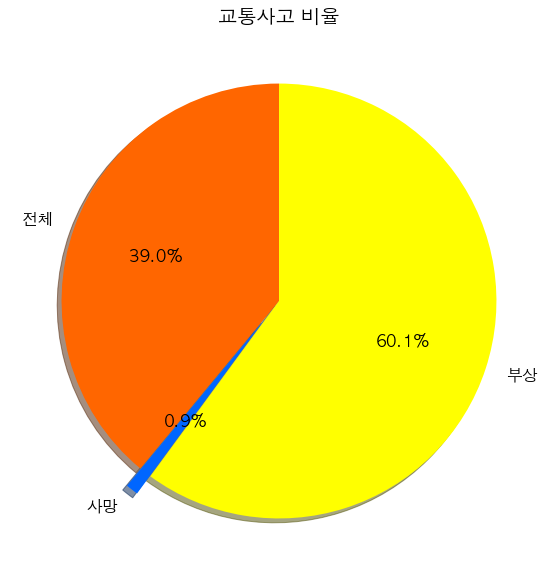

In [48]:
교통사고평균df['교통사고'].plot.pie(labels= ['전체','사망','부상'],
                                colors =['#ff6600', '#0066ff', '#ffff00'],
                                 explode=[0.0 , 0.1, 0.0],
                                 autopct= '%0.1f%%',
                                 shadow=True,
                                 startangle=90)
#제목지정
pyplot.title("교통사고 비율")
#ycnr fkqpf vytl dksgka
pyplot.ylabel(None)
pyplot.show()

### 3) 출력값에 대한 사용자 정의 함수 만들기

'pie'함수가 그래프이 조각 수 만큼 지정된 함수를 호출하면서 각 조각이 차지하는 비율을 파라미터로 전달한다.

지정된 함수는 파라미터로 전달되는 비율을 통해서 몇 번째 항목에 대한 데이터인지를 역으로 추적하여 표시할 텍스트를 구성한 후 리턴해야 한다.

38.99984955787659
38.99984955787659
0.9283680468797684
0.9283680468797684
60.071784257888794
60.071784257888794


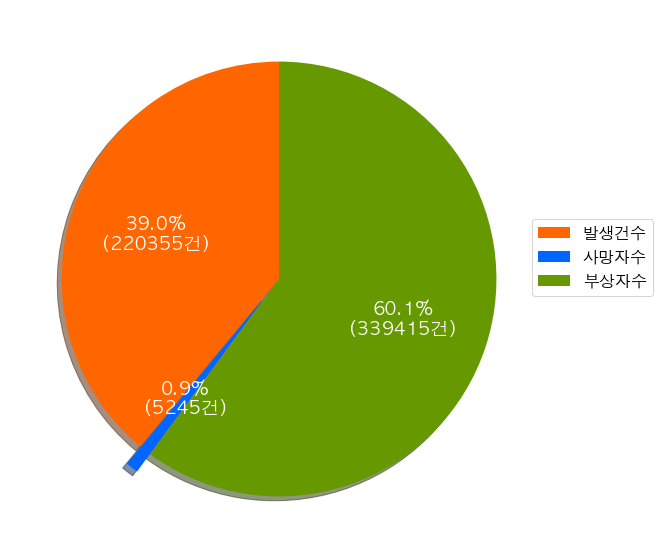

In [49]:
위치 = 0

def make_autopct(비율):
    global 위치
    global 교통사고평균df
    
    print(비율)
    print(비율)
    
    위치 +1
    합계 = 교통사고평균df['교통사고'].sum()
    수치 = int(round(비율*합계/100.0))
    str = "%0.1f%%\n(%d건)" %(비율, 수치)
    return str

#파이그래프의 각 섹션 수 만큼 'make_autopct'함수가 호출되고 이 함수 안에서는 각 섹션에 출력할 텍스트를 리턴한다

교통사고평균df['교통사고'].plot.pie(labels= None,
                                textprops={'color' : "#ffffff",'fontsize': 18},
                                colors =['#ff6600', '#0066ff', '#669900'],
                                 explode=[0.0 , 0.1, 0.0],
                                 autopct= make_autopct,
                                 shadow= True,
                                 startangle=90)
pyplot.ylabel(None)
pyplot.legend(labels=list(교통사고평균.index), bbox_to_anchor=(0.95, 0.625))

pyplot.show()

## #07. 산점도 그래프

- 두 변수 간의 영향력을 보여주기 위해 가로 축과 세로축에 대한 **데이터 포인트**를 그리는데 사용된다
- **데이터 포인트**들이 뭉쳐 있을 수록 두 변수간의 관련성 정도가 높다고 해석한다.

### 예) 교통사고 발생건수와 부상자 수 간의 상관관계
- ** 첫 번쨰 변수 ** 교통사고 발생건 수
- ** 두 번쨰 변수 ** 교통사고 부상자 수

이 두 변수의 상관관계를 표현한 그래프를 산점도로 표현할 수 있다.

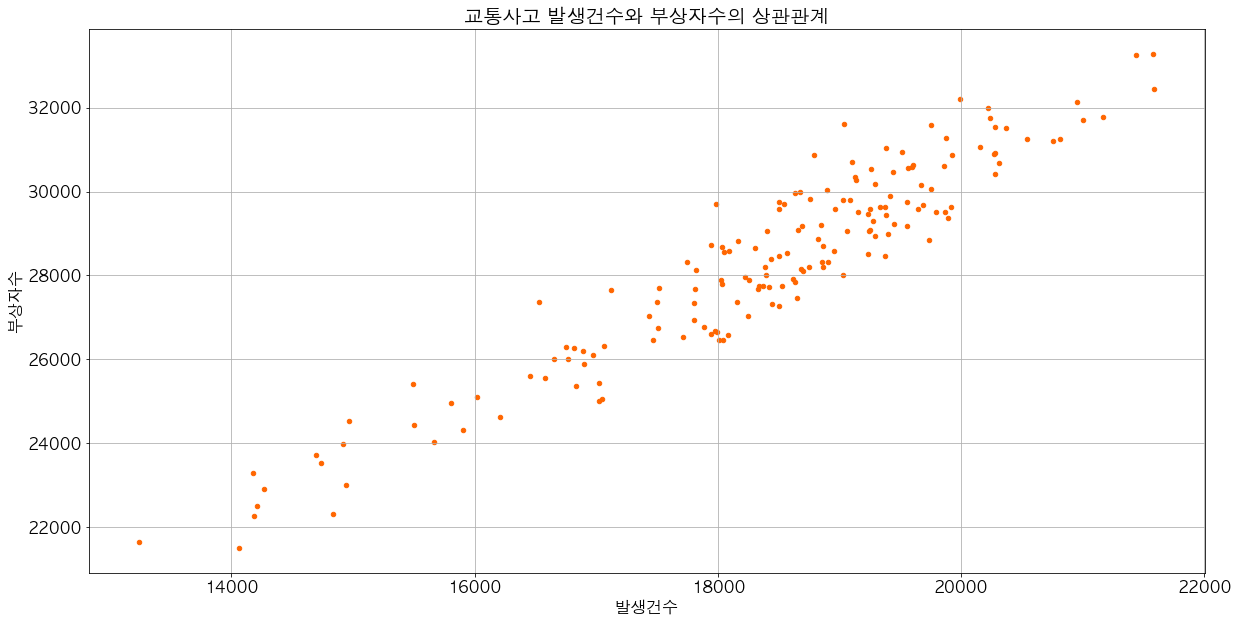

In [50]:
#marker -> o,v,^,<,>,8,s,p,*,h,H,D,d,p,x
교통사고csv.plot.scatter(x='발생건수', y='부상자수', color = '#ff6600', marker='o')
pyplot.grid()

pyplot.title("교통사고 발생건수와 부상자수의 상관관계")
pyplot.ylabel("부상자수")
pyplot.xlabel("발생건수")
pyplot.show()


### 산점도 그래프 해석

점들이 많이 모여 있을 수록 두 변수간의 관계성이 높고, 점들이 흩어져 있을 수록 두 변수간의 관계성이 적다고 해석한다.

#### 정의 관계

x가 증가 할때 y 도 증가하는 직선에 가까운 형태

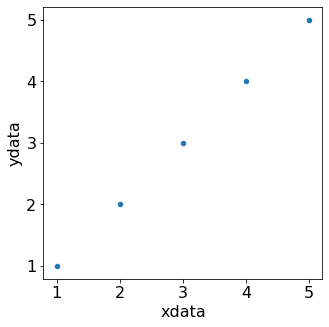

In [51]:
pyplot.rcParams["figure.figsize"]= (5,5)
pyplot.rcParams["font.family"]= 'Malgun Gothic'

df = DataFrame({'xdata' : [1,2,3,4,5],'ydata' : [1,2,3,4,5]})
df.plot.scatter(x='xdata', y='ydata')
pyplot.show()

#### 역의 관계

x가 증가할때 y 는 감소하는 형태

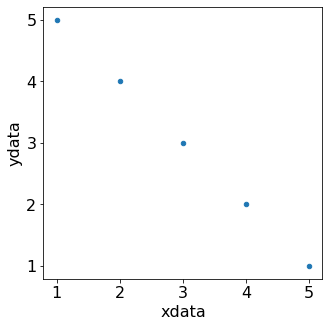

In [52]:
df = DataFrame({'xdata' : [1,2,3,4,5],'ydata' : [5,4,3,2,1]})
df.plot.scatter(x='xdata', y='ydata')
pyplot.show()

#### 선형관계 
점들이 직선에 가깝게 배치된 형태

앞에서 제시한 두 샘플이 선형관계에 소한다.

#### 비선형관계

점들이 직선이 아닌 형태로 배치된 형태

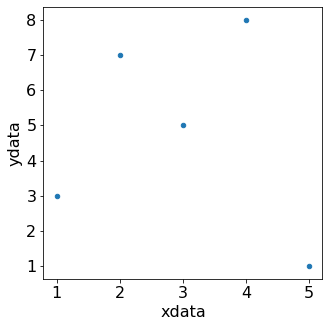

In [53]:
df = DataFrame({'xdata' : [1,2,3,4,5],'ydata' : [3,7,5,8,1]})
df.plot.scatter(x='xdata', y='ydata')
pyplot.show()

### 상관분석

연속형 변수로 측정된 두 변수 간의 선형적 관계를 분석하는 기법.

연속형 변수는 산술 평균을 계산 할 수. 있는 숫자형의 데이터이며, 선형적 관계라 함은 흔히 비례식이 성립되는 관계를 말한다.

예를 들어 a변수가 증가함에 따라b 변수도 증가되는지 혹은 감소하는지를 분석하는것이다.

상관부석은 두 변수간의 선형적 관계에 초점을 두고 있음, 선형관계를 갖는가?어느 방향으로 형성되어 있는가? 그 관계의 정도는 얼마나 큰가? 와 같은 질문을 던지며결과 해석을 수행한다.

### 상관 계수
상관분석에서 두 변수 사이의 선형적이 ㄴ관계정도를 나타내기 위해 사용되는값.
수학적 공식에 의해 구해야한다.

상관분석에는 측ㅈ덩데이터에 때라 ㅎ피어슨 상관분석, 스퍼만상곤분석등의여러가지 분석 방법이 있지만, 일반적으로 피어슨 상관계수를 의미한다.

상관계수 
1 비례
0무상관
1 반비례

상관계수 1과 0사이의 소수점 형태로 점의 분포도를 표현한다.


전체 컬럼에 대한 다중 선 그래프
plot()함수의 color 파라미터를 사용하여 선 색상 지정하기
단일값을 적용한 경우 모든 선이 동일한 색상으로 표시됨